In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import lasio
import os
from sklearn.impute import SimpleImputer

# Function to read las files and convert them to a pandas dataframe
def read_las_files(folder_path):
    las_files = [file for file in os.listdir(folder_path) if file.lower().endswith('.las')]
    df_list = []
    for file in las_files:
        las = lasio.read(os.path.join(folder_path, file))
        df_las = las.df()
        well_name = file.split('.')[0]
        df_las['WELL'] = well_name
        df_las['DEPTH'] = df_las.index
        df_list.append(df_las)
    combined_df = pd.concat(df_list, sort=False)
    combined_df.reset_index(drop=True, inplace=True)
    combined_df['WELL'] = combined_df['WELL'].str.replace('_', '/')
    return combined_df

# Function to align depths across different datasets
def align_depths(df, depth_tolerance=0.1):
    df['DEPTH'] = df['DEPTH'].apply(lambda x: np.round(x / depth_tolerance) * depth_tolerance)
    return df

# Reading well log data
folder_path = 'Force_2020_Dataset/Force_2020_all_wells_train_test_blind_hidden_final'
las_data_df = read_las_files(folder_path)

# Aligning depths in the las data
las_data_df = align_depths(las_data_df)

# Function to clean and prepare the well log data
def clean_and_prepare_data(df):
    features = ['GR', 'RHOB', 'NPHI', 'DTC', 'RDEP', 'PEF', 'CALI', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO']
    df_copy = df.copy()
    df_copy = df_copy[features + ['WELL', 'DEPTH']]
    imputer = SimpleImputer(strategy='median')
    df_copy[features] = imputer.fit_transform(df_copy[features])
    return df_copy

# Cleaning and prepare the data
cleaned_df = clean_and_prepare_data(las_data_df)


In [ ]:
# Display the first few rows to verify the changes
cleaned_df.head()

,GR,RHOB,NPHI,DTC,RDEP,PEF,CALI,SP,BS,ROP,DTS,DCAL,DRHO,WELL,DEPTH
0,68.867023,2.313921,0.326375,206.224609,1.413411,4.36429,12.563158,51.440535,12.250001,25.624892,200.151916,0.468299,0.003399,15/9-13,25.0
1,68.867023,2.313921,0.326375,206.224625,1.413411,4.36429,12.563158,51.440535,12.250001,25.624892,200.151916,0.468299,0.003399,15/9-13,25.2
2,68.867023,2.313921,0.326375,206.224655,1.413411,4.36429,12.563158,51.440535,12.250001,25.624892,200.151916,0.468299,0.003399,15/9-13,25.3
3,68.867023,2.313921,0.326375,206.224670,1.413411,4.36429,12.563158,51.440535,12.250001,25.624892,200.151916,0.468299,0.003399,15/9-13,25.5
4,68.867023,2.313921,0.326375,206.224701,1.413411,4.36429,12.563158,51.440535,12.250001,25.624892,200.151916,0.468299,0.003399,15/9-13,25.6


In [ ]:
# Checking for missing values
print(cleaned_df.isnull().sum())

GR       0
RHOB     0
NPHI     0
DTC      0
RDEP     0
PEF      0
CALI     0
SP       0
BS       0
ROP      0
DTS      0
DCAL     0
DRHO     0
WELL     0
DEPTH    0
dtype: int64


In [ ]:
# Statistical summary of cleaned well log data
cleaned_df.describe()


,GR,RHOB,NPHI,DTC,RDEP,PEF,CALI,SP,BS,ROP,DTS,DCAL,DRHO,DEPTH
count,2.337639e+06,2.337639e+06,2.337639e+06,2.337639e+06,2.337639e+06,2.337639e+06,2.337639e+06,2.337639e+06,2.337639e+06,2.337639e+06,2.337639e+06,2.337639e+06,2.337639e+06,2.337639e+06
mean,7.147750e+01,2.274984e+00,3.291731e-01,1.165424e+02,8.126570e+00,5.121568e+00,1.298257e+01,4.620791e+01,1.320324e+01,1.829290e+02,2.036523e+02,3.087415e+00,1.362822e-02,1.876127e+03
std,3.620066e+01,2.949712e-01,8.781673e-02,2.791098e+01,8.854074e+01,6.779470e+00,2.955504e+00,1.223277e+02,4.026870e+00,2.189835e+03,3.414025e+01,1.599472e+02,4.863805e+00,1.062783e+03
min,-1.562818e+01,0.000000e+00,-5.669064e-02,0.000000e+00,1.000000e-04,1.000000e-04,2.340806e+00,-4.498991e+03,6.000000e+00,-2.149578e+01,6.916318e+01,-2.319966e+01,-7.429339e+03,0.000000e+00
25%,4.786472e+01,2.229155e+00,3.263750e-01,9.710757e+01,9.556557e-01,4.364290e+00,1.232585e+01,4.949735e+01,1.225000e+01,2.435918e+01,2.001519e+02,4.682990e-01,5.630513e-04,1.006700e+03
50%,6.886702e+01,2.313921e+00,3.263750e-01,1.157896e+02,1.413411e+00,4.364290e+00,1.256316e+01,5.144053e+01,1.225000e+01,2.562489e+01,2.001519e+02,4.682990e-01,3.399393e-03,1.764200e+03
75%,8.967383e+01,2.377895e+00,3.263750e-01,1.381875e+02,2.240019e+00,4.364290e+00,1.307715e+01,5.325003e+01,1.225000e+01,2.691000e+01,2.001519e+02,4.682990e-01,6.683806e-03,2.624200e+03
max,1.141292e+03,3.457820e+00,9.995703e-01,3.204789e+02,1.999997e+03,3.831300e+02,3.211106e+01,5.265473e+02,4.200000e+01,9.242916e+04,7.245362e+02,1.002376e+04,4.983452e+01,5.479000e+03


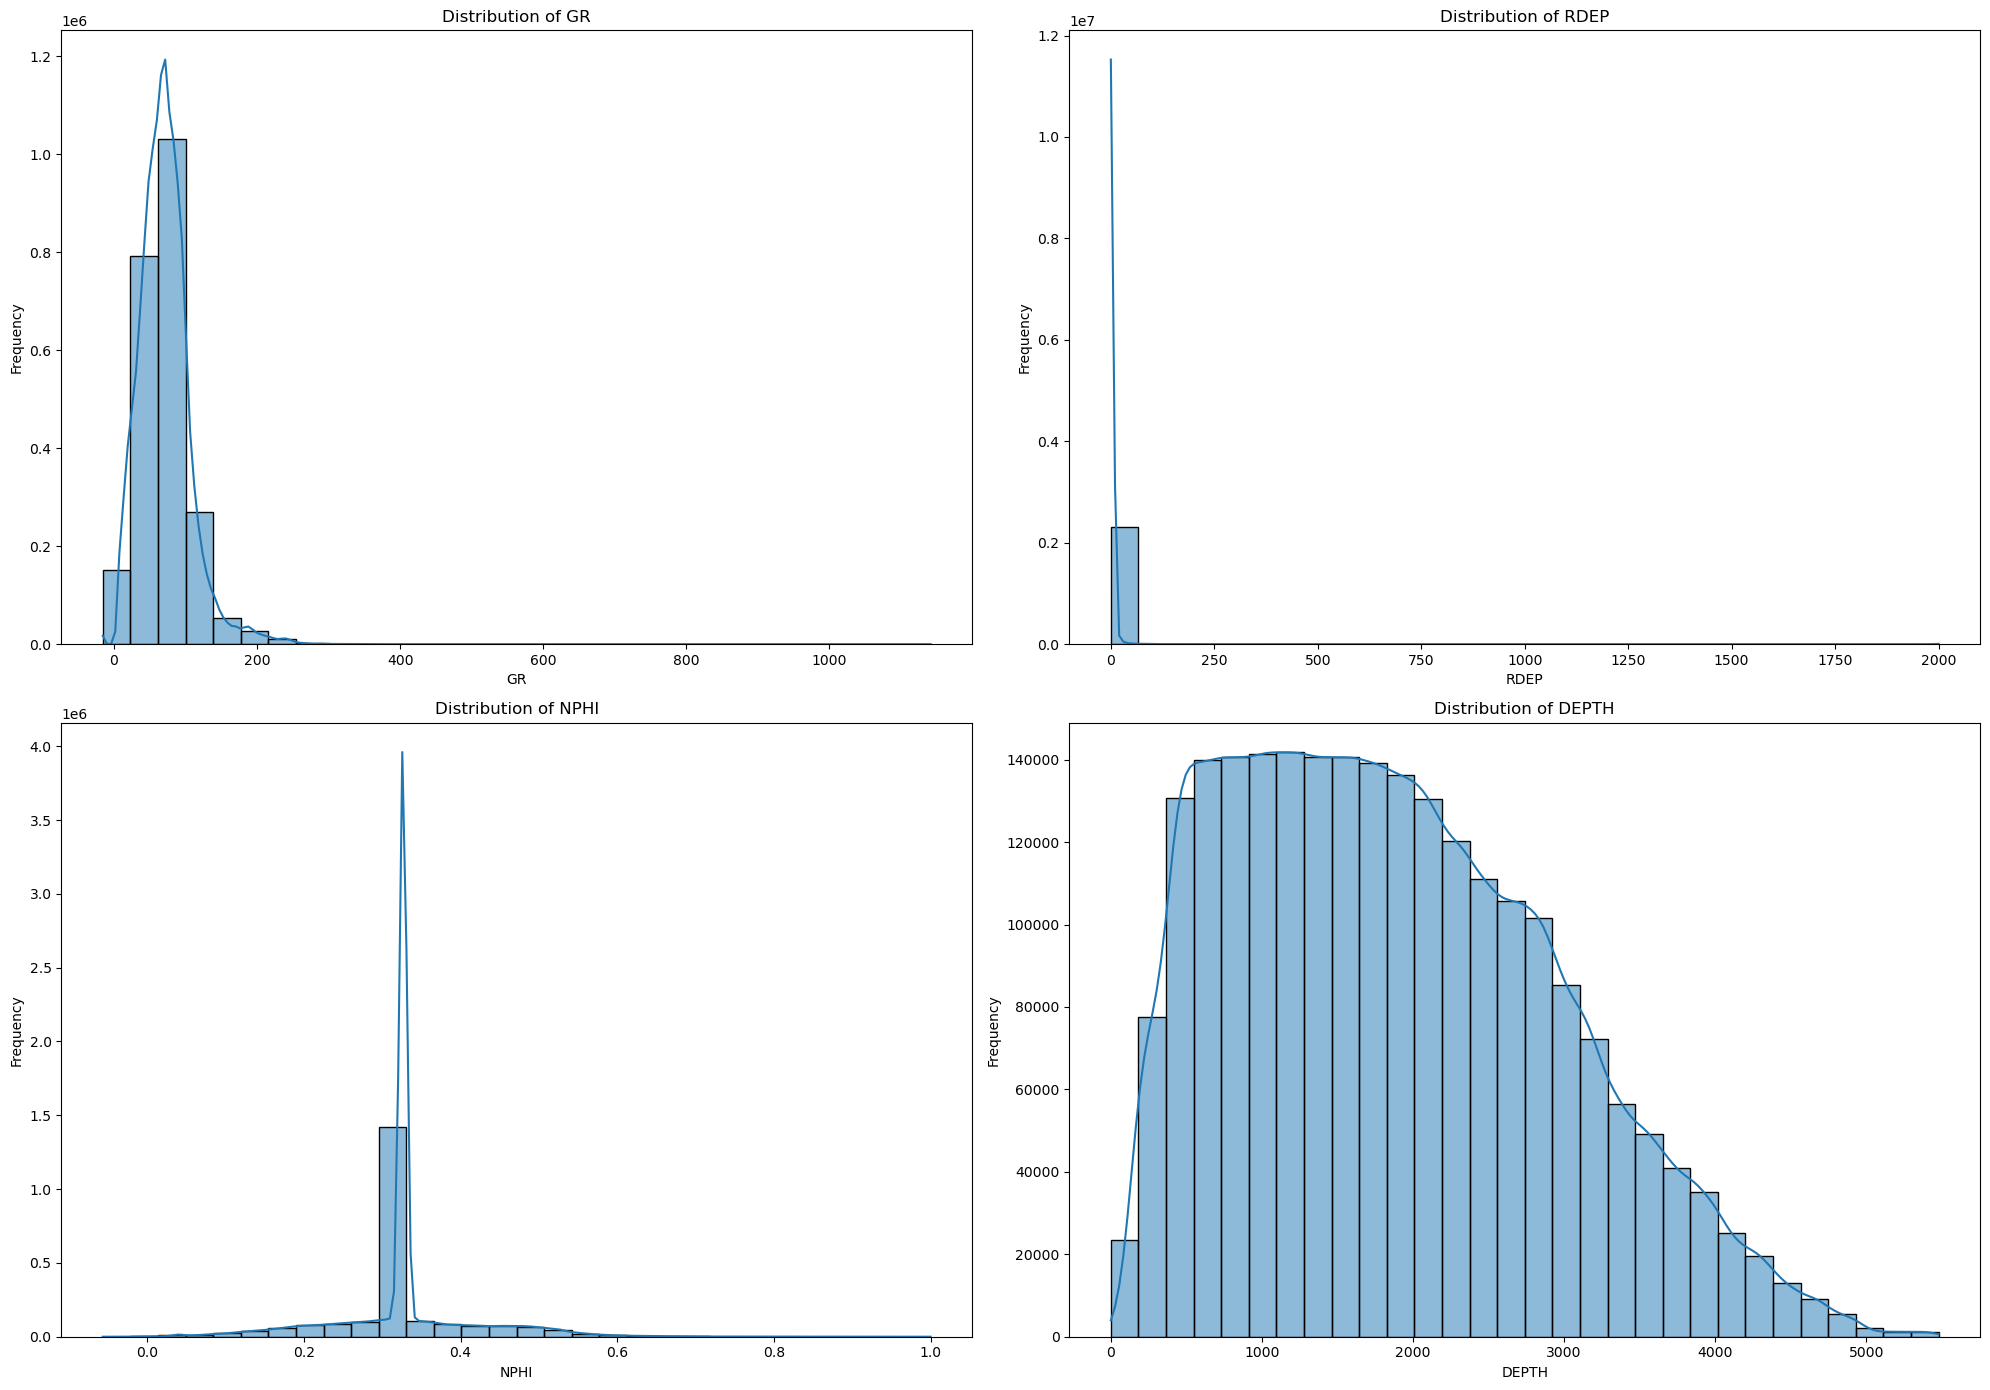

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for key features
features = ['GR', 'RDEP', 'NPHI', 'DEPTH']
plt.figure(figsize=(20, 14))

# Enumerate through features and create subplots
for i, feature in enumerate(features):
    # Creating a subplot in a 2x2 grid: the index for the subplot should start at 1
    plt.subplot(2, 2, i + 1)
    sns.histplot(cleaned_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frequency')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()


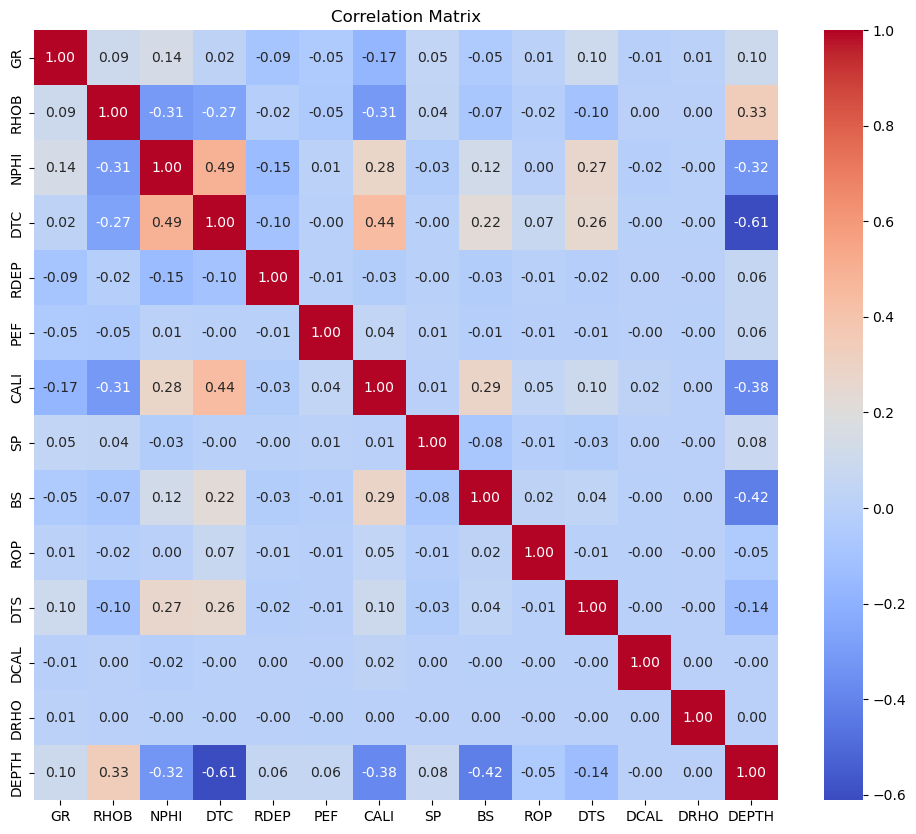

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cleaned_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Importing Excel files as pandas DataFrames
casing_depth_df = pd.read_excel('Force_2020_Dataset/NPD_Casing_depth_most_wells.xlsx')
lithostratigraphy_groups_df = pd.read_excel('Force_2020_Dataset/NPD_Lithostratigraphy_groups_all_wells.xlsx')
lithostratigraphy_member_formations_df = pd.read_excel('Force_2020_Dataset/NPD_Lithostratigraphy_member_formations_all_wells.xlsx')

# Merging Excel files based on 'Well identifier'
# Merge casing depth information with lithostratigraphy groups
merged_df_1 = pd.merge(casing_depth_df, lithostratigraphy_groups_df, on="Well identifier", how="outer", suffixes=('_casing', '_lithogroups'))

# Merging the above result with lithostratigraphy member formations
final_merged_df = pd.merge(merged_df_1, lithostratigraphy_member_formations_df, on="Well identifier", how="outer", suffixes=('', '_lithomembers'))

# Renaming the 'Well identifier' column for clarity
final_merged_df.rename(columns={"Well identifier": "WELL_ID"}, inplace=True)

# Displaying the first few rows of the merged DataFrame
final_merged_df.head()

,Unnamed: 0,WELL_ID,Surface_casing,X_casing,Y_casing,Z_casing,MD_casing,Interpreter_casing,Surface_lithogroups,X_lithogroups,...,MD_lithogroups,Interpreter_lithogroups,HorizonName,Surface,X,Y,Z,MD,Interpreter,HorizonName_lithomembers
0,132.0,15/9-13,30IN CASING,437641.56,6470975.34,-144.0,169.0,NPD,VIKING GP. Top,437612.98,...,2741.0,NPD,VIKING GP. Top,Smith Bank Fm. Top,437611.66,6470983.48,-2765.55,2791.0,NPD,Smith Bank Fm. Top
1,132.0,15/9-13,30IN CASING,437641.56,6470975.34,-144.0,169.0,NPD,VIKING GP. Top,437612.98,...,2741.0,NPD,VIKING GP. Top,Draupne Fm. Top,437612.98,6470982.86,-2715.57,2741.0,NPD,Draupne Fm. Top
2,132.0,15/9-13,30IN CASING,437641.56,6470975.34,-144.0,169.0,NPD,VIKING GP. Top,437612.98,...,2741.0,NPD,VIKING GP. Top,Heather Fm. Top,437612.47,6470983.16,-2736.56,2762.0,NPD,Heather Fm. Top
3,132.0,15/9-13,30IN CASING,437641.56,6470975.34,-144.0,169.0,NPD,VIKING GP. Top,437612.98,...,2741.0,NPD,VIKING GP. Top,Roedby Fm. Top,437613.78,6470982.14,-2648.58,2674.0,NPD,Roedby Fm. Top
4,132.0,15/9-13,30IN CASING,437641.56,6470975.34,-144.0,169.0,NPD,VIKING GP. Top,437612.98,...,2741.0,NPD,VIKING GP. Top,Sola Fm. Top,437613.71,6470982.26,-2664.58,2690.0,NPD,Sola Fm. Top


In [ ]:
# Checking for any missing values and inconsistencies in the merged DataFrame
print("Missing values before cleaning:")
print(final_merged_df.isnull().sum())


Missing values before cleaning:
Unnamed: 0                  5473
WELL_ID                        0
Surface_casing              5473
X_casing                    5473
Y_casing                    5473
Z_casing                    5473
MD_casing                   5473
Interpreter_casing          5473
Surface_lithogroups            0
X_lithogroups                  0
Y_lithogroups                  0
Z_lithogroups                  0
MD_lithogroups                 0
Interpreter_lithogroups        0
HorizonName                    0
Surface                        0
X                              0
Y                              0
Z                              0
MD                             0
Interpreter                    0
HorizonName_lithomembers       0
dtype: int64


In [ ]:
# Dropping 'Unnamed: 0' as it an artifact from merging or reading the Excel files
final_merged_df.drop(columns=['Unnamed: 0'], inplace=True)

# Handling Missing Values
# Dropping columns with missing values
final_merged_df.drop(columns=['Surface_casing', 'X_casing', 'Y_casing', 'Z_casing', 'MD_casing', 'Interpreter_casing'], inplace=True)

# Resetting index after dropping columns
final_merged_df.reset_index(drop=True, inplace=True)


In [ ]:
# Checking for any missing values and inconsistencies in the merged DataFrame
print("Missing values after cleaning:")
print(final_merged_df.isnull().sum())

Missing values after cleaning:
WELL_ID                     0
Surface_lithogroups         0
X_lithogroups               0
Y_lithogroups               0
Z_lithogroups               0
MD_lithogroups              0
Interpreter_lithogroups     0
HorizonName                 0
Surface                     0
X                           0
Y                           0
Z                           0
MD                          0
Interpreter                 0
HorizonName_lithomembers    0
dtype: int64


In [ ]:
# Checking for duplicates based on WELL_ID
print("Number of duplicate WELL_ID entries before cleaning:", final_merged_df.duplicated(subset=['WELL_ID']).sum())


Number of duplicate WELL_ID entries before cleaning: 40575


In [ ]:
# Removing duplicates
final_merged_df = final_merged_df.drop_duplicates(subset=['WELL_ID'], keep='first')

# Reset index after dropping duplicates
final_merged_df.reset_index(drop=True, inplace=True)

# Verifying removal of duplicates
print("Unique WELL_IDs after removing duplicates:", final_merged_df['WELL_ID'].nunique())


Unique WELL_IDs after removing duplicates: 118


In [ ]:
# Checking for duplicates based on WELL_ID
print("Number of duplicate WELL_ID entries: after cleaning", final_merged_df.duplicated(subset=['WELL_ID']).sum())


Number of duplicate WELL_ID entries: after cleaning 0


In [ ]:
# Display the first few rows of the cleaned merged DataFrame
final_merged_df.head()

,WELL_ID,Surface_lithogroups,X_lithogroups,Y_lithogroups,Z_lithogroups,MD_lithogroups,Interpreter_lithogroups,HorizonName,Surface,X,Y,Z,MD,Interpreter,HorizonName_lithomembers
0,15/9-13,VIKING GP. Top,437612.98,6470982.86,-2715.57,2741.0,NPD,VIKING GP. Top,Smith Bank Fm. Top,437611.66,6470983.48,-2765.55,2791.0,NPD,Smith Bank Fm. Top
1,15/9-15,HEGRE GP. Top,436801.36,6463017.26,-2795.60,2821.0,NPD,HEGRE GP. Top,Skagerrak Fm. Top,436801.36,6463017.26,-2795.60,2821.0,NPD,Skagerrak Fm. Top
2,15/9-17,VIKING GP. Top,438596.82,6478968.21,-2689.80,2712.0,NPD,VIKING GP. Top,Skagerrak Fm. Top,438596.98,6478968.31,-2718.80,2741.0,NPD,Skagerrak Fm. Top
3,16/1-2,ROTLIEGENDES GP. Top,455221.35,6533321.39,-2783.00,2808.0,NPD,ROTLIEGENDES GP. Top,Grid Fm. Top,455221.35,6533321.39,-1635.00,1660.0,NPD,Grid Fm. Top
4,16/10-2,VIKING GP. Top,443275.72,6444985.36,-2790.76,2818.0,NPD,VIKING GP. Top,Skagerrak Fm. Top,443273.68,6444987.04,-2895.73,2923.0,NPD,Skagerrak Fm. Top


In [ ]:
# Descriptive Statistics for merged excel data
print("Descriptive Statistics for numerical features:")
final_merged_df.describe()

Descriptive Statistics for numerical features:


,X_lithogroups,Y_lithogroups,Z_lithogroups,MD_lithogroups,X,Y,Z,MD
count,118.000000,1.180000e+02,118.000000,118.000000,118.000000,1.180000e+02,118.000000,118.000000
mean,488136.892119,6.680118e+06,-2733.747119,2810.957627,488135.598220,6.680123e+06,-2504.921017,2575.737288
std,36645.740801,1.354472e+05,742.475221,785.327439,36623.277185,1.354490e+05,1023.943698,1073.665671
min,423259.800000,6.406641e+06,-4605.230000,130.000000,423270.920000,6.406641e+06,-5084.260000,655.000000
25%,456302.150000,6.561479e+06,-3174.860000,2240.250000,456392.822500,6.561479e+06,-3229.227500,1568.750000
50%,479110.115000,6.739252e+06,-2735.590000,2794.500000,479106.555000,6.739337e+06,-2507.045000,2538.500000
75%,524979.862500,6.790391e+06,-2210.670000,3281.000000,525226.512500,6.790392e+06,-1543.360000,3274.250000
max,572632.570000,6.856646e+06,-108.000000,4726.000000,572632.710000,6.856278e+06,-629.990000,5118.000000


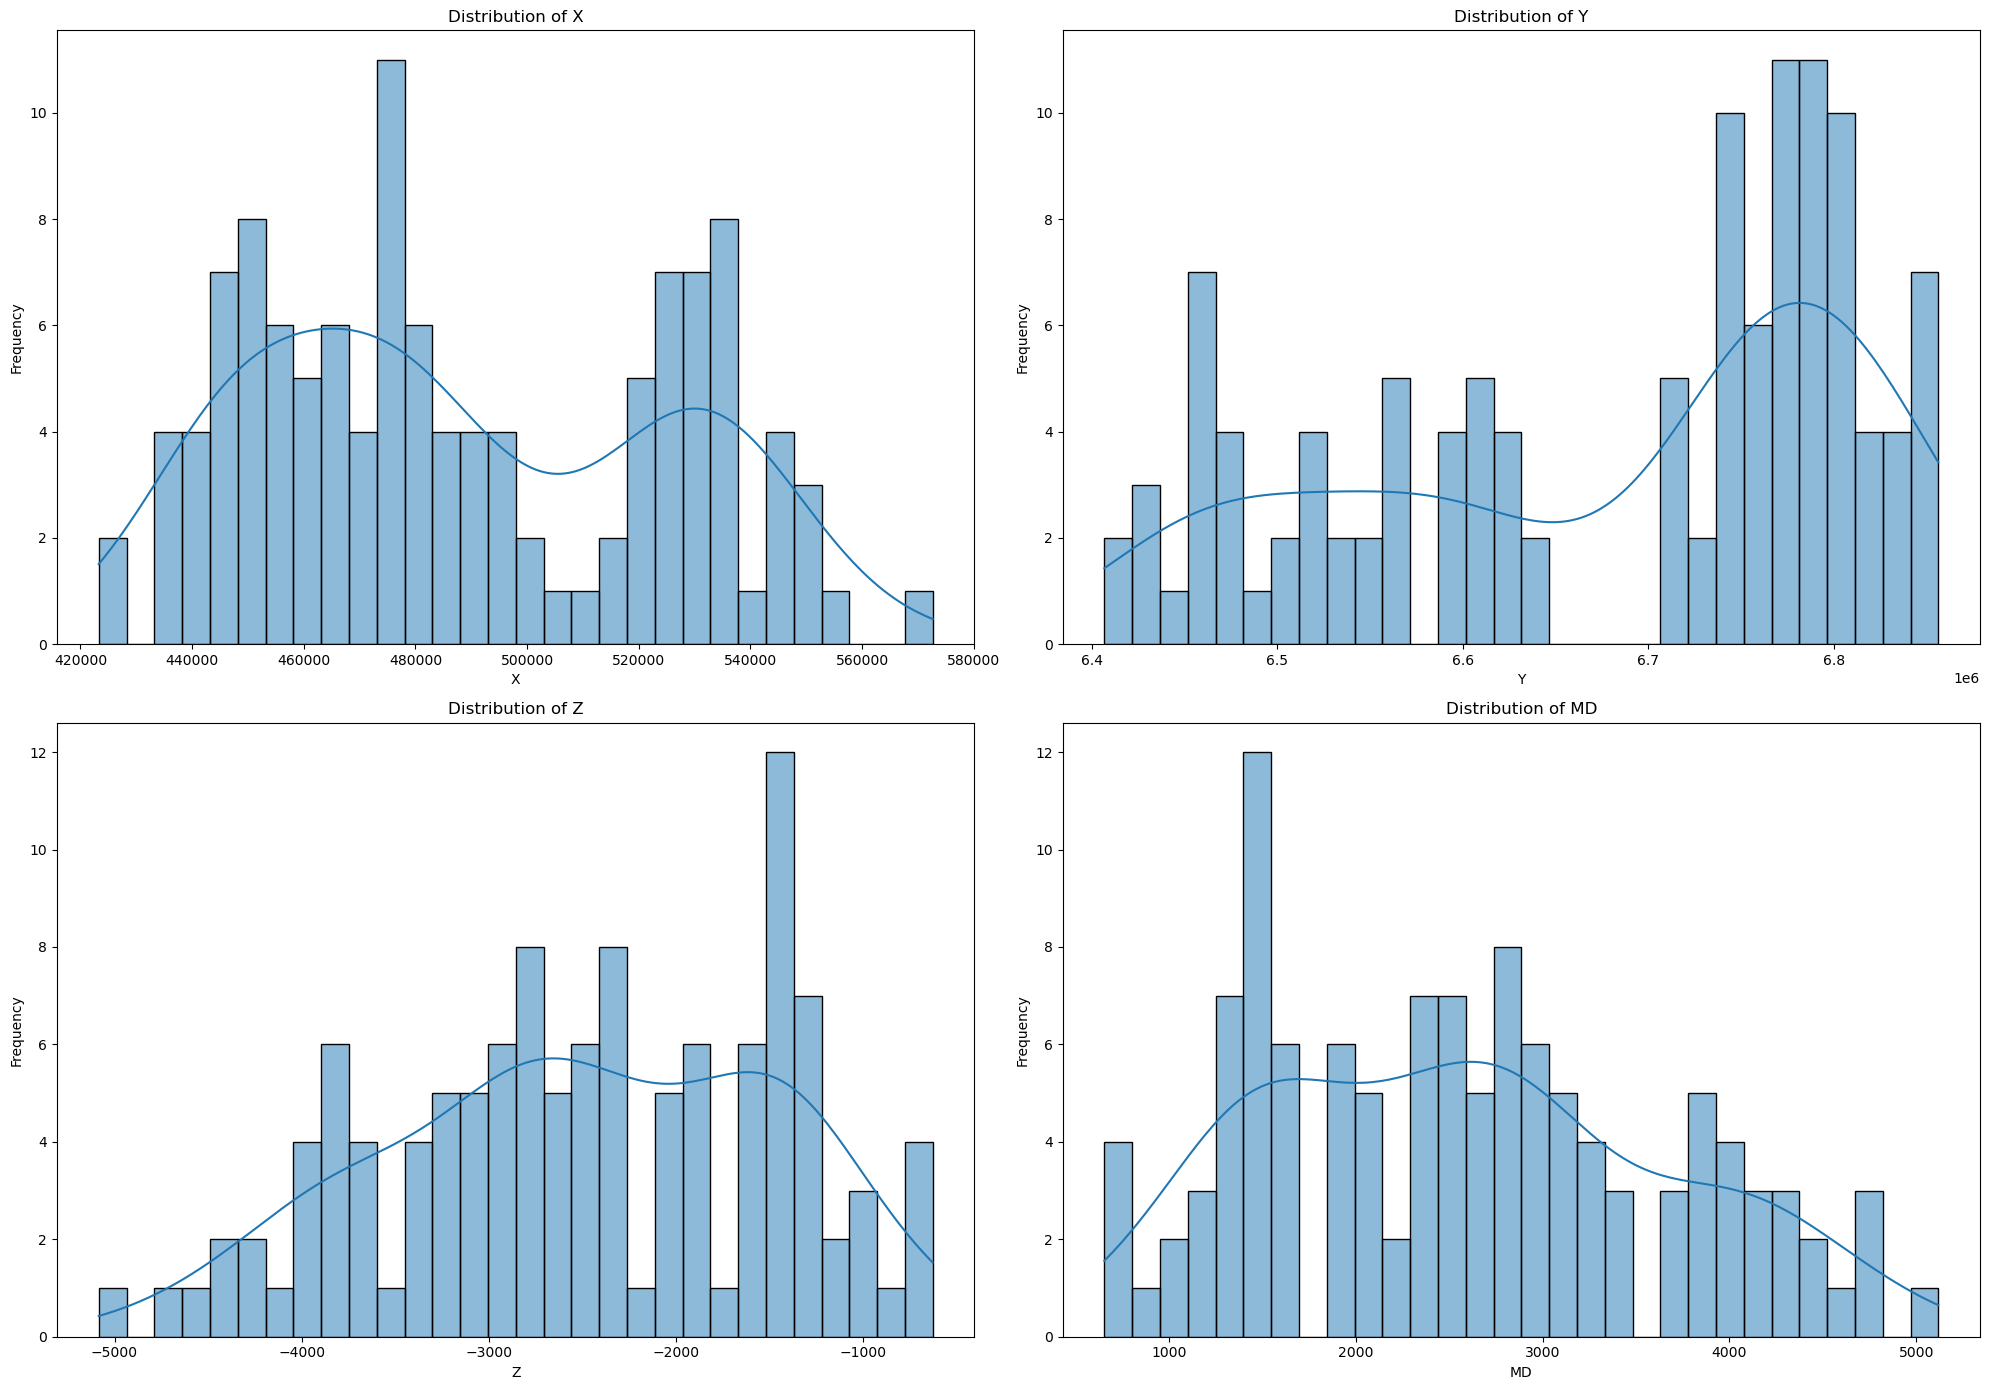

In [ ]:
# Visualizing distributions of key numerical features after handling missing values
numerical_features = ['X', 'Y', 'Z', 'MD']
plt.figure(figsize=(20, 14))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(final_merged_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# Identifying unique values in categorical features for potential encoding
categorical_features = ['Surface_lithogroups', 'Interpreter_lithogroups', 'HorizonName', 'HorizonName_lithomembers']
for feature in categorical_features:
    print(f'\nUnique values in {feature}: {final_merged_df[feature].nunique()}')


Unique values in Surface_lithogroups: 7

Unique values in Interpreter_lithogroups: 1

Unique values in HorizonName: 7

Unique values in HorizonName_lithomembers: 16


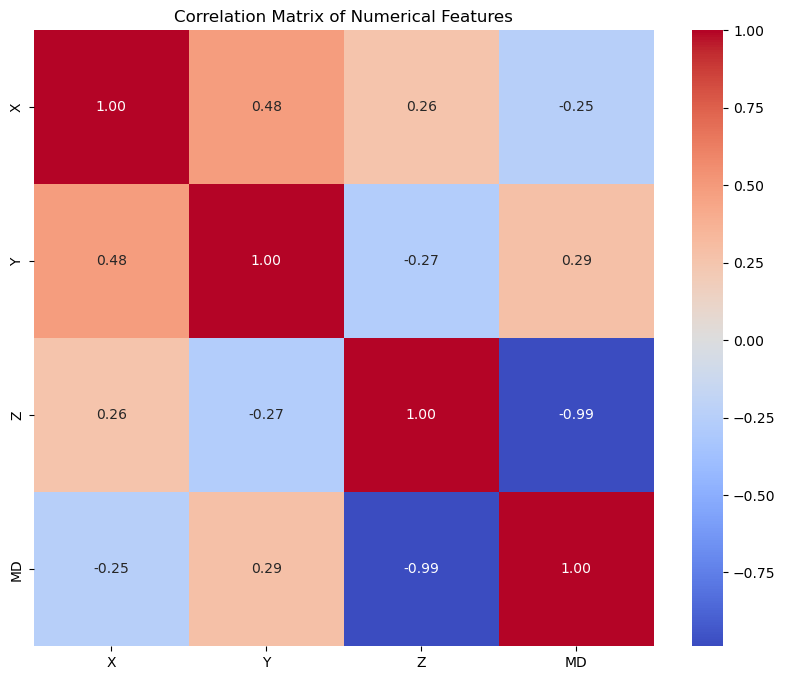

In [ ]:
# Correlation Matrix of numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(final_merged_df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
# Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 'RHOB' is the target variable for regression
X_reg = cleaned_df.drop(columns=['RHOB', 'WELL', 'DEPTH'])  # Excluding non-feature columns
y_reg = cleaned_df['RHOB']

# Splitting the dataset
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

# Training the model with scaled features
model_reg = LinearRegression()
model_reg.fit(X_train_reg_scaled, y_train_reg)

# Predicting and evaluating with scaled features
predictions_reg = model_reg.predict(X_test_reg_scaled)
rmse = mean_squared_error(y_test_reg, predictions_reg, squared=False)
print(f"Regression RMSE: {rmse}")


Regression RMSE: 0.8006885942710591


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Encoding the categorical data
encoder = LabelEncoder()
final_merged_df['Surface_lithogroups_encoded'] = encoder.fit_transform(final_merged_df['Surface_lithogroups'])

# Selecting features and target for classification
X_cls = final_merged_df[['X', 'Y', 'Z', 'MD']]  # Hypothetical feature selection
y_cls = final_merged_df['Surface_lithogroups_encoded']

# Splitting the dataset
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

# Training the model with scaled features
model_cls = RandomForestClassifier(n_estimators=100, random_state=42)
model_cls.fit(X_train_cls_scaled, y_train_cls)

# Predicting and evaluating with scaled features
predictions_cls = model_cls.predict(X_test_cls_scaled)
accuracy = accuracy_score(y_test_cls, predictions_cls)
f1 = f1_score(y_test_cls, predictions_cls, average='weighted')

print(f"Classification Accuracy: {accuracy}")
print(f"Classification F1-Score: {f1}")


NameError: name 'final_merged_df' is not defined

In [ ]:
# Deployment
import joblib

# Saving the regression model
joblib.dump(model_reg, 'linear_regression_model.joblib')

# Saving the classification model
joblib.dump(model_cls, 'model_classification.pkl')

print("Models saved successfully.")

NameError: name 'model_reg' is not defined